In [1]:
#Includes necesarios
from sklearn.tree import DecisionTreeClassifier

import pandas as pd
import numpy as np
from sklearn.model_selection import RandomizedSearchCV,GridSearchCV
from sklearn.model_selection import train_test_split

from auxiliar import get_train_set,get_holdout_set,create_prediction
import preprocessing as pr

from auxiliar import plot_cm, plot_roc_curve,plot_tree
from sklearn.metrics import classification_report

# Arbol de Decision

Obtenemos el dataset con el cual entrenaremos nuestro modelo:

In [2]:
X,y = get_train_set(missings='category')

## Preprocesamiento: sin hacer feature_engineering del tp1

Para entrenar el arbol necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **aplicar_OHE**:

In [3]:
pr.init_OHE(X)

In [4]:
X_ohe = pr.apply_OHE(X)

Partimos nuestro set en *train* y *validation*:

In [7]:
X_train, X_validation, y_train, y_validation = train_test_split(X_ohe,y, test_size=0.2, random_state=19, stratify=y)

Busco los mejores hiperparametros para el arbol de decision con randomsearch. La metrica que se utiliza para comparar los modelos obtenidos en cada iteracion es *roc_auc_score*:

In [8]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': np.arange(40, 70),
    "criterion": ["gini", "entropy"],
}

clf = DecisionTreeClassifier(random_state=19)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train, y_train)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.9051398122991433
Best params {'min_samples_leaf': 46, 'max_depth': 9, 'criterion': 'gini'}


Armo el modelo de arbol de decision con los hiperparametros calculados:

In [9]:
model_tree = rgscv.best_estimator_

Entreno el modelo con el train set:

In [10]:
model_tree.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=46, random_state=19)

Predigo con el validation set:

In [11]:
tree_predict = model_tree.predict(X_validation)

**Metricas**

In [12]:
print(classification_report(y_validation, tree_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.79      0.54      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.83      0.75      0.77      6513
weighted avg       0.85      0.85      0.84      6513



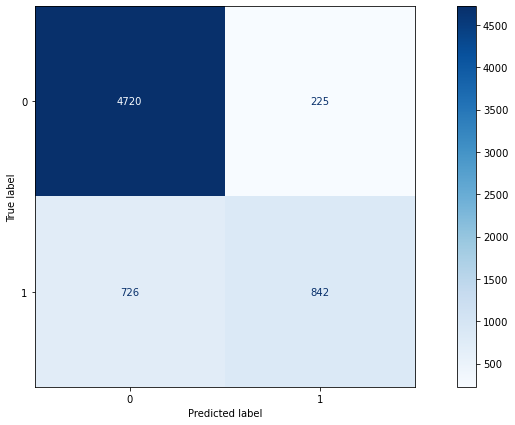

In [13]:
plot_cm(model_tree, X_validation, y_validation)

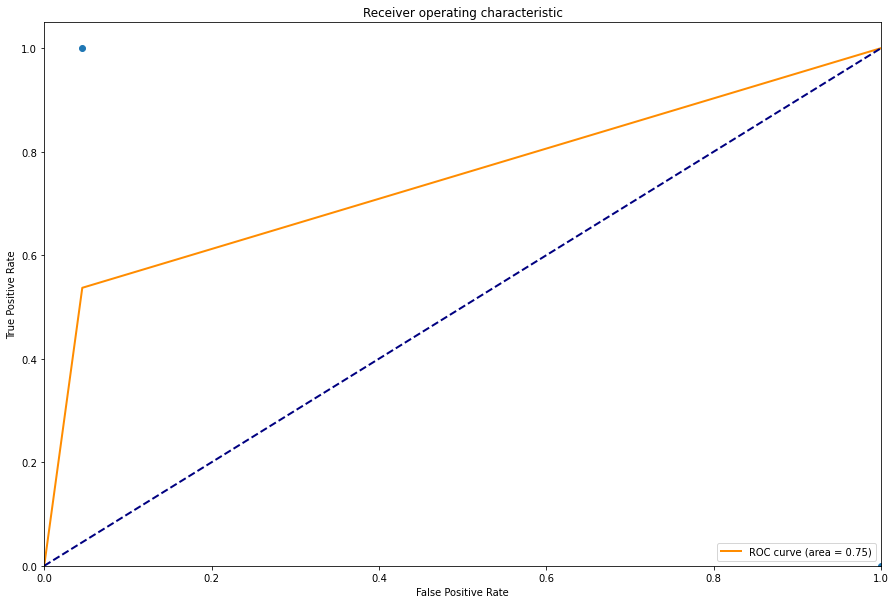

In [14]:
plot_roc_curve(y_validation,tree_predict)

## Preprocesamiento: con feature_engineering del tp1

Nuevamente obtenemos el dataset para entrenar nuestro modelo. A diferencia del preprocesado anterior, ahora aplicaremos el feature engineering obtenido del tp1:

In [15]:
X_fe_p1 = pr.preprocesado1(X)

Para entrenar el arbol necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **aplicar_OHE**:

In [16]:
pr.init_OHE(X_fe_p1)

In [18]:
X_ohe_p1 = pr.apply_OHE(X_fe_p1)

Realizamos la particion de nuestros datos en *train* y *validation*:

In [20]:
X_train_p1, X_validation_p1, y_train_p1, y_validation_p1 = train_test_split(X_ohe_p1,y, test_size=0.2, random_state=19, stratify=y)

Busco los mejores hiperparametros para el arbol de decision con randomsearch. La metrica que se utiliza para comparar los modelos en cada iteracion es *roc_auc_score*:

In [21]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': np.arange(40, 70),
    "criterion": ["gini", "entropy"],
}

clf = DecisionTreeClassifier(random_state=19)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train_p1, y_train_p1)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.9030476633259725
Best params {'min_samples_leaf': 69, 'max_depth': 9, 'criterion': 'entropy'}


Armo el modelo de arbol de decision con los hiperparametros calculados:

In [22]:
model_tree_p1 = rgscv.best_estimator_

Entreno el modelo con el train set:

In [24]:
model_tree_p1.fit(X_train_p1, y_train_p1)

DecisionTreeClassifier(criterion='entropy', max_depth=9, min_samples_leaf=69,
                       random_state=19)

Predigo con el validation set:

In [25]:
tree_predict = model_tree_p1.predict(X_validation_p1)

**Metricas**

In [26]:
print(classification_report(y_validation_p1, tree_predict))

              precision    recall  f1-score   support

           0       0.87      0.95      0.91      4945
           1       0.78      0.54      0.64      1568

    accuracy                           0.85      6513
   macro avg       0.82      0.75      0.77      6513
weighted avg       0.85      0.85      0.84      6513



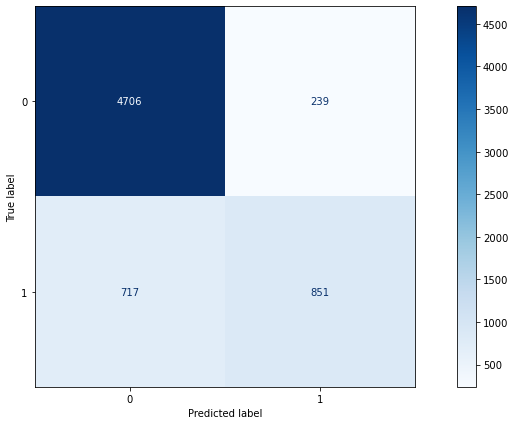

In [27]:
plot_cm(model_tree_p1, X_validation_p1, y_validation_p1)

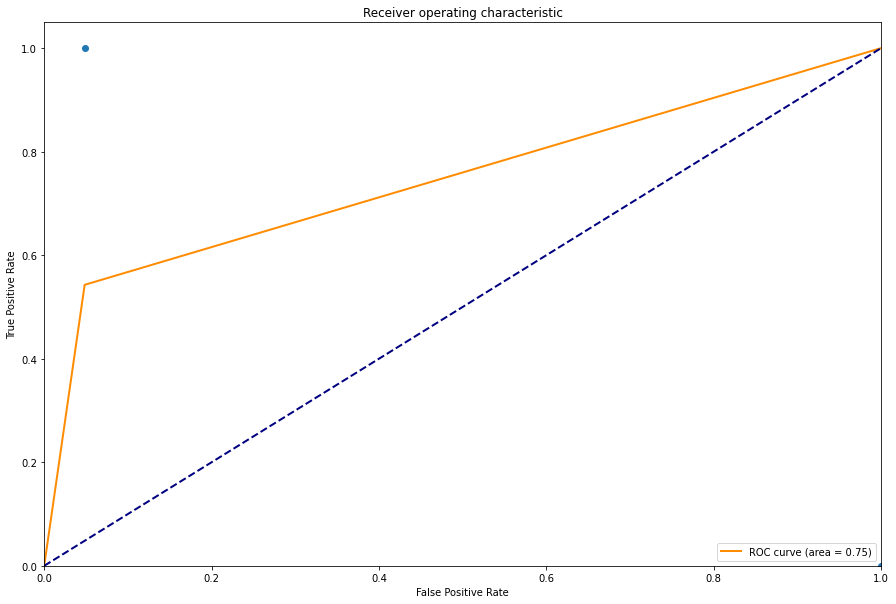

In [28]:
plot_roc_curve(y_validation_p1,tree_predict)

## Preprocesamiento 2:

Nuevamente obtenemos el dataset para entrenar nuestro modelo. A diferencia del preprocesado anterior, ahora aplicaremos el preprocesamiento 2 que consiste en generar nuevas columnas a partir de las que tenemos.:

In [29]:
X_fe_p2 = pr.preprocesado2(X)

Para entrenar el arbol necesitamos aplicar OHE en las columnas categoricas, para esto llamamos a la funcion de preprocesamiento **aplicar_OHE**:

In [30]:
pr.init_OHE(X_fe_p2)

In [31]:
X_ohe_p2 = pr.apply_OHE(X_fe_p2)

Realizamos la particion de nuestros datos en *train* y *validation*:

In [33]:
X_train_p2, X_validation_p2, y_train_p2, y_validation_p2 = train_test_split(X_ohe_p2,y, test_size=0.2, random_state=19, stratify=y)

Busco los mejores hiperparametros para el arbol de decision con randomsearch. La metrica que se utiliza para comparar los modelos en cada iteracion es *roc_auc_score*:

In [34]:
params = {
    'max_depth': np.arange(1, 10),
    'min_samples_leaf': np.arange(40, 70),
    "criterion": ["gini", "entropy"],
}

clf = DecisionTreeClassifier(random_state=19)

rgscv = RandomizedSearchCV(
    clf, params, n_iter=60, scoring='roc_auc', n_jobs=-1, cv=5, return_train_score=True
).fit(X_train_p2, y_train_p2)

print(f"Best score: {rgscv.best_score_}")
print(f"Best params {rgscv.best_params_}")

Best score: 0.9037095847380485
Best params {'min_samples_leaf': 43, 'max_depth': 9, 'criterion': 'gini'}


Armo el modelo de arbol de decision con los hiperparametros calculados:

In [35]:
model_tree_p2 = rgscv.best_estimator_

Entreno el modelo con el train set:

In [36]:
model_tree_p2.fit(X_train_p2, y_train_p2)

DecisionTreeClassifier(max_depth=9, min_samples_leaf=43, random_state=19)

Predigo con el validation set:

In [37]:
tree_predict = model_tree_p2.predict(X_validation_p2)

**Metricas**

In [ ]:
print(classification_report(y_validation_p2, tree_predict))

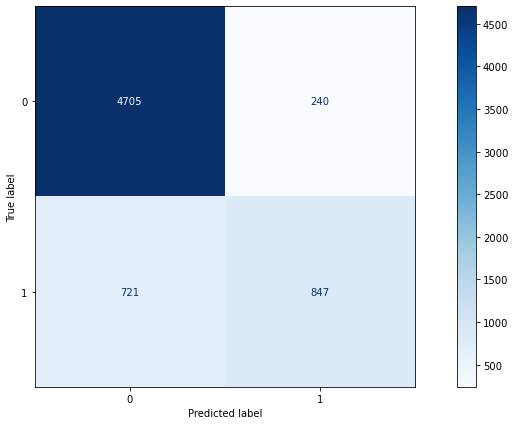

In [38]:
plot_cm(model_tree_p2, X_validation_p2, y_validation_p2)

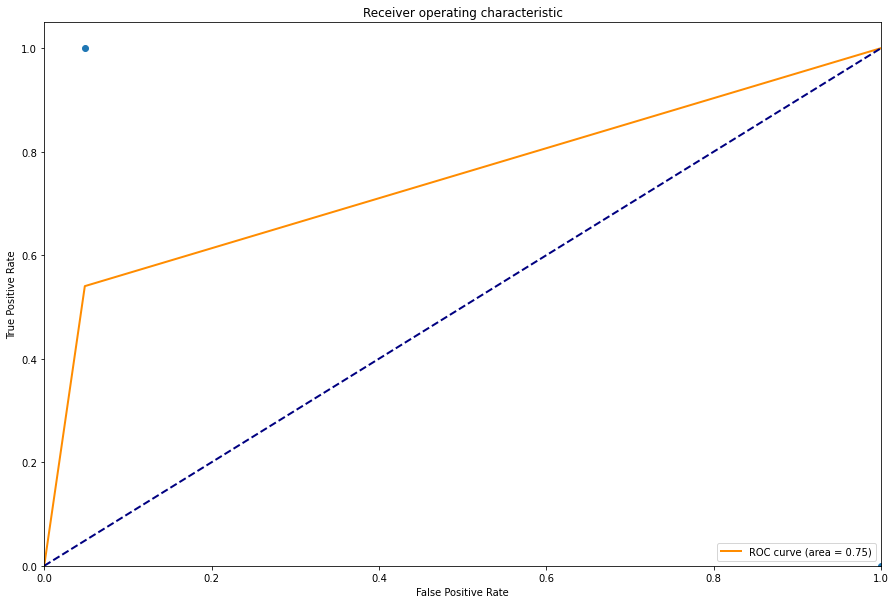

In [39]:
plot_roc_curve(y_validation_p2,tree_predict)

# Conclusión

Vimos que no hay mucha diferencia entre el preprocesamiento 1 y el preprocesamiento 2. Nos quedamos con el preprocesamiento 1 (OHE)

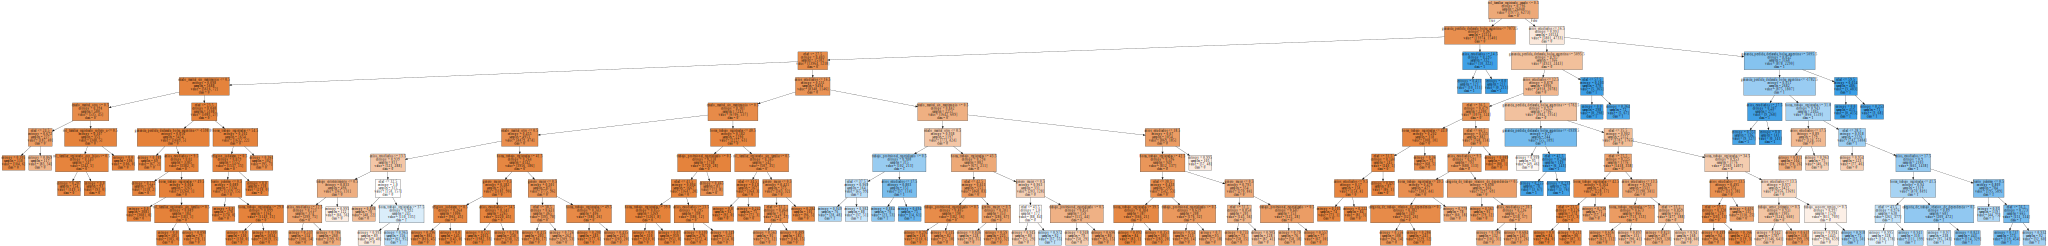

In [40]:
plot_tree(model_tree_p1,X_train_p1.columns)

# Prediccion

In [41]:
ids, X_holdout = get_holdout_set(missings='category')

In [42]:
pr.init_OHE(X_fe_p1)

In [43]:
X_holdout_fe = pr.preprocesado1(X_holdout)

In [47]:
X_holdout_ohe = pr.apply_OHE(X_holdout_fe)

In [45]:
tree_predict = model_tree_p1.predict(X_holdout_ohe)

In [46]:
create_prediction(ids,tree_predict,file_name='arbol_desicion_prediction')